<a href="https://colab.research.google.com/github/AbsolutelySaurabh/Machine-Learning/blob/master/ai-coursework/Day-3-4%20-%20DataPreprocessing%3ALogistic%20Regression/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [0]:
process to get data from kaggle
steps : enable api token --> download kaggle.json file --> upload it here

!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list
!kaggle datasets download -d 'overload10/adult-census-dataset'

! mkdir train
! unzip adult-census-dataset.zip -d train

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = pd.read_csv('train/adult.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
print(data['salary'].value_counts())

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


In [0]:
# #assign outcome as 0 if income <=50k and 1 if >=50k
# data['salary'] = [0 if x == '<=50K' else 1 for x in data['salary']]
# data['country'] = ['US' if x == 'United-States' else 'Other' for x in data['country']]

# data['country'].value_counts()

In [0]:
X = data.drop('salary', 1)
y = data.salary

In [0]:
print(X.head(5))

   age          workclass  fnlwgt  ... capital-loss  hours-per-week         country
0   39          State-gov   77516  ...            0              40   United-States
1   50   Self-emp-not-inc   83311  ...            0              13   United-States
2   38            Private  215646  ...            0              40   United-States
3   53            Private  234721  ...            0              40   United-States
4   28            Private  338409  ...            0              40            Cuba

[5 rows x 14 columns]


In [0]:
print(y.head(5))

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: salary, dtype: object


##Basic Data Cleaning



1.   Data Types:
        

        Numeric eg: age
        Categorical eg: gender, nationaliy
        Ordinal eg: low/medium/high



Models can only handle numeric.

Must convert categorical and ordinal features into numeric features.


1.   Create Dommu features
2.   Transform a categorical feature into a set of dummy features, each representing a unique category.
3.   In the set of dummy features, 1 indicate it belongs to that category.



In [0]:
#educatioon is a categorical feature
print(X['education'].head())

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: object


In [0]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [0]:
workclass = X['workclass'].unique()
education = X['education'].unique()
marital_status = X['marital-status'].unique()
occupation = X['occupation'].unique()
relationship = X['relationship'].unique()
race = X['race'].unique()
sex = X['sex'].unique()
country = X['country'].unique()

workclass

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [0]:
# from sklearn.preprocessing import LabelEncoder

# # education_data = pd.DataFrame(education, columns = ['education'])
# labelEncoder = LabelEncoder()
# X['education'] = labelEncoder.fit_transform(X['education'])
# X['workclass'] = labelEncoder.fit_transform(X['workclass'])
# X['marital-status'] = labelEncoder.fit_transform(X['marital-status'])
# X['occupation'] = labelEncoder.fit_transform(X['occupation'])
# X['race'] = labelEncoder.fit_transform(X['race'])
# X['sex'] = labelEncoder.fit_transform(X['sex'])
# X['country'] = labelEncoder.fit_transform(X['country'])

# X

Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called **‘One-Hot Encoding’**. 


 In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In [0]:
#using get_dummie sin pandas, but that will create a mess, as lot of columns owuld be 0's
# so use OneHotEncoder() in scikit learn ot just pandas dummies

#decide which categorical variables you eant to use in model
for col_name in X.columns:
  if X[col_name].dtypes == 'object':
    unique_cat = len(X[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat = unique_cat))

Feature 'workclass' has 9 unique categories
Feature 'education' has 16 unique categories
Feature 'marital-status' has 7 unique categories
Feature 'occupation' has 15 unique categories
Feature 'relationship' has 6 unique categories
Feature 'race' has 5 unique categories
Feature 'sex' has 2 unique categories
Feature 'country' has 42 unique categories


In [0]:
#Although 'country' has a lot of unique categories, most of then have few obs
# print(X['country'].value_counts().sort_values(ascending = False).head(10))

In [0]:
#In this case bucket low frequency categories as "Other"
X['country'] = ['US' if x == ' United-States' else 'Other' for x in X['country']]
X['country'].value_counts()

US       29170
Other     3391
Name: country, dtype: int64

In [0]:
#create a list of features to dummy
todummy_list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']

In [0]:
#function to dummy all the categorical variables used for modelling
def dummy_df(df, todummy_list):
  for x in todummy_list:
    dummies = pd.get_dummies(df[x], prefix = x, dummy_na = False)
    df = df.drop(x, 1)
    df = pd.concat([df, dummies], axis = 1)
  return df

In [0]:
X['country']

0           US
1           US
2           US
3           US
4        Other
         ...  
32556       US
32557       US
32558       US
32559       US
32560       US
Name: country, Length: 32561, dtype: object

In [0]:
X = dummy_df(X, todummy_list)
print(X.head())

   age  fnlwgt  education-num  ...  sex_ Male  country_Other  country_US
0   39   77516             13  ...          1              0           1
1   50   83311             13  ...          1              0           1
2   38  215646              9  ...          1              0           1
3   53  234721              7  ...          1              0           1
4   28  338409             13  ...          0              1           0

[5 rows x 68 columns]


### Handle missing data:

Solutions:


1.   Remove observations that have missing data. But it can cause major issues.
2.   Alternative: replacing it with median, mean, mode(higher freq data).



In [0]:
#check how much of data is missing
X.isnull().sum().sort_values(ascending = False).head(10)

country_US               0
education_ Bachelors     0
education_ 1st-4th       0
education_ 5th-6th       0
education_ 7th-8th       0
education_ 9th           0
education_ Assoc-acdm    0
education_ Assoc-voc     0
education_ Doctorate     0
country_Other            0
dtype: int64

In [0]:
# Since currelty i've used kaggle data, so it's already cleaned. mail source of data : http://archive.ics.uci.edu/ml/datasets/Adult

# replceing missing values
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
imp.fit(X)
X = pd.DataFrame(data = imp.transform(X), columns = X.columns)

X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,country_Other,country_US
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## More Data Exploration

Making smarter decisions with data.

**1. Outlier Detection**


*   Eg: college placements, mark zuckerberg income
*   value which can shoot the overall result, making other values to lag.

  Approaches:

*   Turkey IQR
*   Kernel density estimation




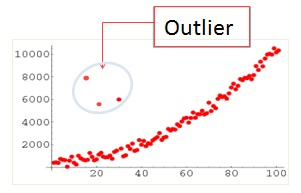

In [0]:
from IPython.display import Image
Image(filename='outlier_image.jpg')

In [0]:
X['age'].head()

0    39.0
1    50.0
2    38.0
3    53.0
4    28.0
Name: age, dtype: float64

In [0]:
#Outlier detection using kernel Density Estimation : based on probability density

from sklearn.preprocessing import scale
# from statsmodels.nonparametric.kde import KDEUnivariate

# def find_outliers_kde(x):
#   x_scaled = scale(list(map(float , x)))
#   # print(x_scaled)

#   kde = KDEUnivariate(x_scaled)
#   kde.fit(bw="scott", fft=True)
#   pred = kde.evaluate(x_scaled)

#   n = sum(pred < 0.05)
#   print(n)
#   outlier_ind = np.asarray(pred).argsort()[:n]
#   outlier_value = np.asarray(x)[outlier_ind]

#   return outlier_ind, outlier_value


# kde_indices, kde_values = find_outliers_kde(X['age'])
# print(np.sort(kde_values))

In [0]:
#distrubution of features

#feature engineering/ normalization scaling